# Unit 2 - Problem Set 2

#### Introduction

Each month, a credit card statement will come with the option for you to pay a minimum amount of your charge, usually 2% of the balance due. However, the credit card company earns money by charging interest on the balance that you don't pay. So even if you pay credit card payments on time, interest is still accruing on the outstanding balance.

Say you've made a $5,000 purchase on a credit card with an 18% annual interest rate and a 2% minimum monthly payment rate. If you only pay the minimum monthly amount for a year, how much is the remaining balance?

You can think about this in the following way.

At the beginning of month 0 (when the credit card statement arrives), assume you owe an amount we will call *b0*(b for balance; subscript 0 to indicate this is the balance at month 0).

Any payment you make during that month is deducted from the balance. Let's call the payment you make in month 0, *p0*. Thus, your unpaid balance for month 0, *ub0*, is equal to *b0 - p0*.

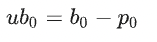

At the beginning of month 1, the credit card company will charge you interest on your unpaid balance. So if your annual interest rate is , then at the beginning of month 1, your new balance is your previous unpaid balance ub0, plus the interest on this unpaid balance for the month. In algebra, this new balance would be

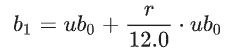

In month 1, we will make another payment, p1. That payment has to cover some of the interest costs, so it does not completely go towards paying off the original charge. The balance at the beginning of month 2, , can be calculated by first calculating the unpaid balance after paying , then by adding the interest accrued:

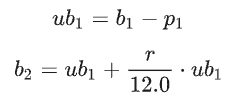

If you choose just to pay off the minimum monthly payment each month, you will see that the compound interest will dramatically reduce your ability to lower your debt.

Let's look at an example. If you've got a $5,000 balance on a credit card with 18% annual interest rate, and the minimum monthly payment is 2% of the current balance, we would have the following repayment schedule if you only pay the minimum payment each month:

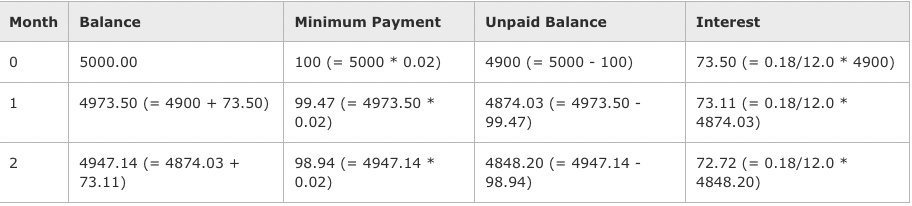

You can see that a lot of your payment is going to cover interest, and if you work this through month 12, you will see that after a year, you will have paid $1165.63 and yet you will still owe $4691.11 on what was originally a $5000.00 debt. Pretty depressing!

#### <ins>Problem 1 - Paying Debt off in a Year</ins>

Write a program to calculate the credit card balance after one year if a person only pays the minimum monthly payment required by the credit card company each month.

The following variables contain values as described below:

    1. balance - the outstanding balance on the credit card

    2. annualInterestRate - annual interest rate as a decimal

    3. monthlyPaymentRate - minimum monthly payment rate as a decimal

For each month, calculate statements on the monthly payment and remaining balance. At the end of 12 months, print out the remaining balance. Be sure to print out no more than two decimal digits of accuracy - so print

    Remaining balance: 813.41

instead of

    Remaining balance: 813.4141998135

So your program only prints out one thing: the remaining balance at the end of the year in the format:

    Remaining balance: 4784.0

A summary of the required math is found below:
    
        Monthly interest rate= (Annual interest rate) / 12.0
        Minimum monthly payment = (Minimum monthly payment rate) x (Previous balance)
        Monthly unpaid balance = (Previous balance) - (Minimum monthly payment)
        Updated balance each month = (Monthly unpaid balance) + (Monthly interest rate x Monthly unpaid balance)



In [15]:
balance = int(input("Enter the balance: "))
annualInterestRate = float(input("Enter the interest rate as a decimal: "))
monthlyPaymentRate = float(input("enter the minimum monthly payment rate as a decimal: "))
numMonths = int(input("Enter the number of months: "))
monthlyRate = annualInterestRate / 12.0

print(balance)
print(annualInterestRate)
print(monthlyPaymentRate)

484
0.2
0.04


In [16]:
for i in range(1,numMonths+1):
    monthlyPayment = monthlyPaymentRate * balance
    unpaidbalance = balance - monthlyPayment
    monthlyInterest = monthlyRate * unpaidbalance 
    balance = unpaidbalance + monthlyInterest
    print("Month " + str(i) + f" Remaining balance: {balance:.2f}" )
    

Month 1 Remaining balance: 472.38
Month 2 Remaining balance: 461.05
Month 3 Remaining balance: 449.98
Month 4 Remaining balance: 439.18
Month 5 Remaining balance: 428.64
Month 6 Remaining balance: 418.35
Month 7 Remaining balance: 408.31
Month 8 Remaining balance: 398.51
Month 9 Remaining balance: 388.95
Month 10 Remaining balance: 379.62
Month 11 Remaining balance: 370.50
Month 12 Remaining balance: 361.61


#### <ins>Problem 2 - Paying Debt Off in a Year</ins>

Now write a program that calculates the minimum fixed monthly payment needed in order pay off a credit card balance within 12 months. By a fixed monthly payment, we mean a single number which does not change each month, but instead is a constant amount that will be paid each month.

In this problem, we will not be dealing with a minimum monthly payment rate.

The following variables contain values as described below:

    1. balance - the outstanding balance on the credit card

    2. annualInterestRate - annual interest rate as a decimal

The program should print out one line: the lowest monthly payment that will pay off all debt in under 1 year, for example:
    
    Lowest Payment: 180

Assume that the interest is compounded monthly according to the balance at the end of the month (after the payment for that month is made). The monthly payment must be a multiple of $10 and is the same for all months. Notice that it is possible for the balance to become negative using this payment scheme, which is okay. A summary of the required math is found below:
    
            Monthly interest rate = (Annual interest rate) / 12.0
            Monthly unpaid balance = (Previous balance) - (Minimum fixed monthly payment)
            Updated balance each month = (Monthly unpaid balance) + (Monthly interest rate x Monthly unpaid balance)

In [55]:

import math
balance = int(input("Enter the balance: "))
annualInterestRate = float(input("Enter the interest rate as a decimal: "))
#monthlyPaymentRate = float(input("enter the minimum monthly payment rate as a decimal: "))
numMonths = int(input("Enter the number of months: "))
monthlyRate = annualInterestRate / 12.0
minPayment = 10
final_balance = 0 


print(balance)
print(annualInterestRate)
print(monthlyRate)

3926
0.2
0.016666666666666666


In [58]:
def remaining_balance(monthlyRate,balance,numMonths,minPayment):
    rem_balance = balance
    for i in range(1,numMonths+1):
        unpaidbalance = rem_balance - minPayment
        monthlyInterest = monthlyRate * unpaidbalance 
        rem_balance = unpaidbalance + monthlyInterest
    return round(rem_balance,2)

In [56]:
while True:
    test_balance = remaining_balance(monthlyRate, balance, numMonths, minPayment)
    if test_balance <= final_balance:
        break
    minPayment += 10
print(minPayment)
        

360


#### <ins>Problem 3 - Using Bisection Search to Make the Program Faster</ins>

You'll notice that in Problem 2, your monthly payment had to be a multiple of $10. Why did we make it that way? You can try running your code locally so that the payment can be any dollar and cent amount (in other words, the monthly payment is a multiple of $0.01). Does your code still work? It should, but you may notice that your code runs more slowly, especially in cases with very large balances and interest rates. (Note: when your code is running on our servers, there are limits on the amount of computing time each submission is allowed, so your observations from running this experiment on the grading system might be limited to an error message complaining about too much time taken.)

Well then, how can we calculate a more accurate fixed monthly payment than we did in Problem 2 without running into the problem of slow code? We can make this program run faster using a technique introduced in lecture - bisection search!

The following variables contain values as described below:

    1. balance - the outstanding balance on the credit card

    2. annualInterestRate - annual interest rate as a decimal

To recap the problem: we are searching for the smallest monthly payment such that we can pay off the entire balance within a year. What is a reasonable lower bound for this payment value? $0 is the obvious answer, but you can do better than that. If there was no interest, the debt can be paid off by monthly payments of one-twelfth of the original balance, so we must pay at least this much every month. One-twelfth of the original balance is a good lower bound.

What is a good upper bound? Imagine that instead of paying monthly, we paid off the entire balance at the end of the year. What we ultimately pay must be greater than what we would've paid in monthly installments, because the interest was compounded on the balance we didn't pay off each month. So a good upper bound for the monthly payment would be one-twelfth of the balance, after having its interest compounded monthly for an entire year.

In short:
        
            Monthly interest rate = (Annual interest rate) / 12.0
            Monthly payment lower bound = Balance / 12
            Monthly payment upper bound = (Balance x (1 + Monthly interest rate)12) / 12.0

Write a program that uses these bounds and bisection search (for more info check out the Wikipedia page on bisection search) to find the smallest monthly payment to the cent (no more multiples of $10) such that we can pay off the debt within a year. Try it out with large inputs, and notice how fast it is (try the same large inputs in your solution to Problem 2 to compare!). Produce the same return value as you did in Problem 2.




In [74]:

balance = int(input("Enter the balance: "))
annualInterestRate = float(input("Enter the interest rate as a decimal: "))
#monthlyPaymentRate = float(input("enter the minimum monthly payment rate as a decimal: "))
numMonths = int(input("Enter the number of months: "))
monthlyRate = annualInterestRate / 12.0
monthlyLowerPayment = balance / 12.0
monthlyUpperPayment = (balance * (1+monthlyRate)**12.0) / 12.0
paymentguess = (monthlyUpperPayment + monthlyLowerPayment) / 2.0
final_balance = 0
epsilon = 0.01

print(balance)
print(annualInterestRate)
print(monthlyRate)


7100
0.0
0.0


In [75]:
while True:
    test_balance = remaining_balance(monthlyRate, balance, numMonths, paymentguess)
    if abs(test_balance - final_balance) < epsilon:
        break
    if test_balance - final_balance < 0:
        monthlyUpperPayment = paymentguess
    if test_balance - final_balance > 0:
        monthlyLowerPayment = paymentguess
    paymentguess = (monthlyUpperPayment + monthlyLowerPayment) / 2.0    
print(round(paymentguess, 2))

591.67
